%pwd

### FFT Practice Problem 1

In [2]:
import numpy as np

# Define the time-domain signal
f = [0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0]

# Perform the 8-point FFT
fft_result = np.fft.fft(f)

# Display the result
fft_result

array([2. +0.j        , 0.5-1.20710678j, 0. +0.j        , 0.5-0.20710678j,
       0. +0.j        , 0.5+0.20710678j, 0. +0.j        , 0.5+1.20710678j])

C:\Users\Baron\AppData\Local\Temp\ipykernel_19496\4109051566.py:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, np.abs(fft_result), use_line_collection=True)


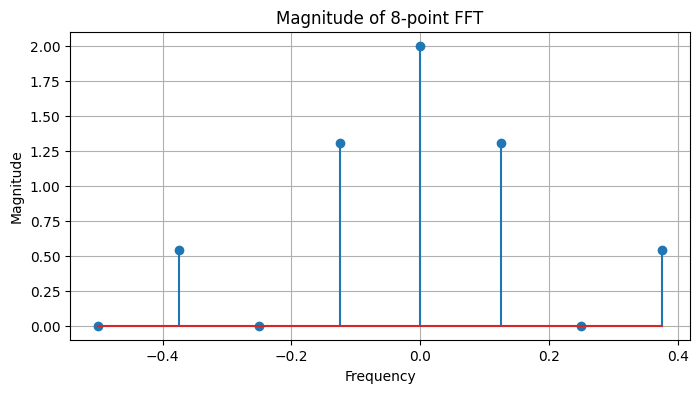

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time-domain signal
f = [0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0]

# Perform the 8-point FFT
fft_result = np.fft.fft(f)

# Compute the frequencies
n = len(f)
frequencies = np.fft.fftfreq(n)

# Plot the magnitude of the FFT results
plt.figure(figsize=(8, 4))
plt.stem(frequencies, np.abs(fft_result), use_line_collection=True)
plt.title('Magnitude of 8-point FFT')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

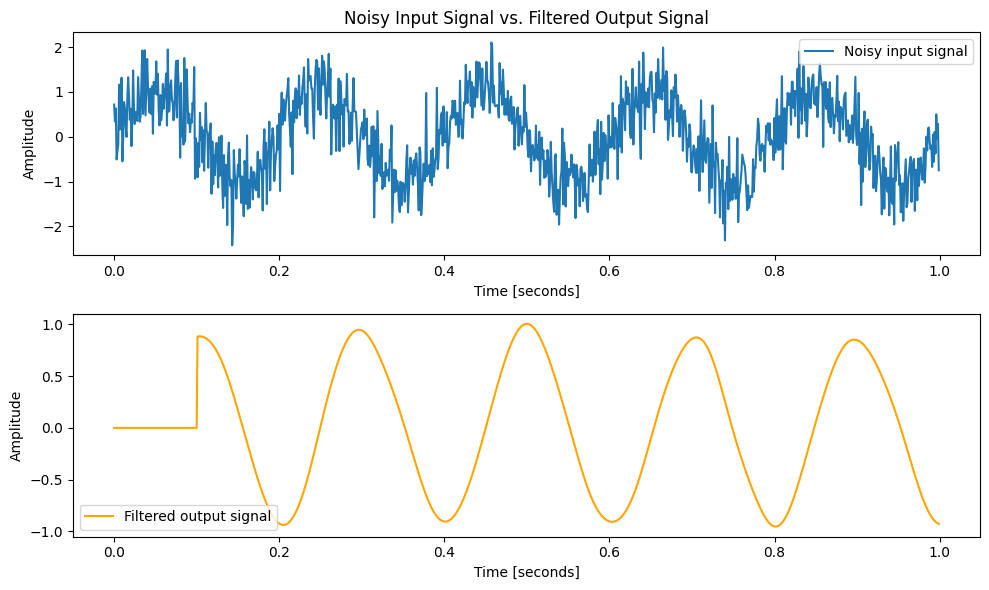

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the FIR filter coefficients (e.g., a low-pass filter using a windowed sinc function)
def design_fir_filter(num_taps, cutoff_freq, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normalized_cutoff = cutoff_freq / nyquist
    return signal.firwin(num_taps, normalized_cutoff)

# Floating-point FIR filter implementation
def fir_filter(input_signal, filter_coefficients):
    num_taps = len(filter_coefficients)
    output_signal = np.zeros(len(input_signal))
    
    # Apply the FIR filter
    for n in range(num_taps, len(input_signal)):
        output_signal[n] = np.dot(input_signal[n-num_taps:n], filter_coefficients[::-1])
    
    return output_signal

# Generate a sample input signal (a noisy sine wave)
sampling_rate = 1000  # Hz
t = np.linspace(0, 1.0, int(sampling_rate), endpoint=False)  # 1-second time vector
input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))  # 5 Hz sine wave + noise

# Design an FIR low-pass filter
num_taps = 101  # Number of filter coefficients (the length of the filter)
cutoff_freq = 10.0  # Cutoff frequency of the filter in Hz
fir_coefficients = design_fir_filter(num_taps, cutoff_freq, sampling_rate)

# Apply the FIR filter
output_signal = fir_filter(input_signal, fir_coefficients)

# Plot the input and output signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label="Noisy input signal")
plt.title("Noisy Input Signal vs. Filtered Output Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, output_signal, label="Filtered output signal", color='orange')
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

###

### Bit Accurate But incorrect because the output is a square wave

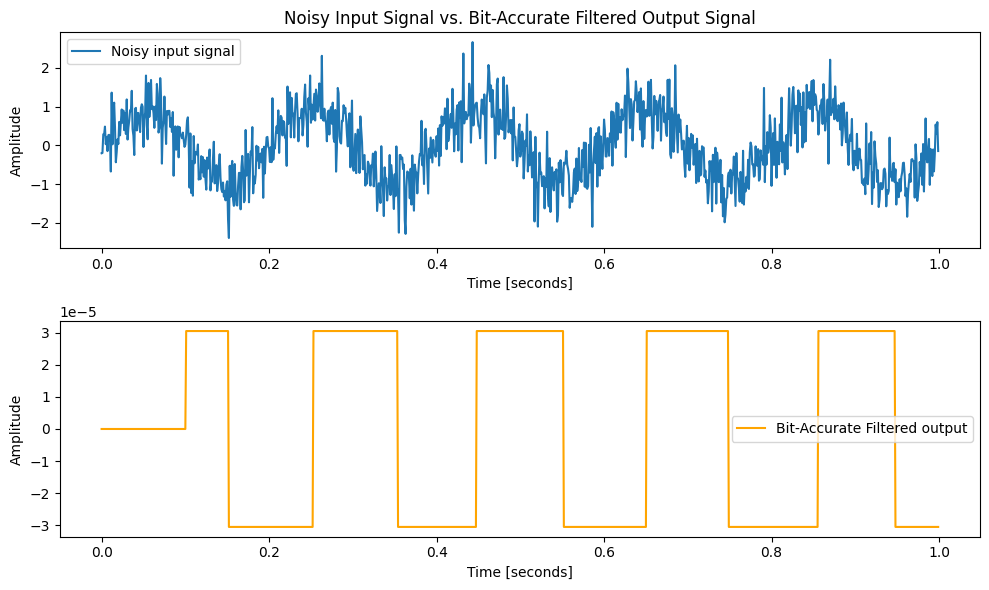

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Helper function to simulate fixed-point arithmetic (16-bit signed integers)
def fixed_point(value, bits=16):
    max_value = 2**(bits - 1) - 1
    min_value = -2**(bits - 1)
    
    # Quantize to fixed-point range and handle overflow
    quantized_value = np.round(value).astype(np.int32)
    quantized_value = np.clip(quantized_value, min_value, max_value)
    
    return quantized_value

# Bit-accurate FIR filter implementation using fixed-point arithmetic
def bit_accurate_fir_filter(input_signal, filter_coefficients, frac_bits=15):
    num_taps = len(filter_coefficients)
    output_signal = np.zeros(len(input_signal))
    
    # Convert filter coefficients to fixed-point
    fixed_coefficients = fixed_point(filter_coefficients * (2**frac_bits))

    # Apply the FIR filter in fixed-point arithmetic
    for n in range(num_taps, len(input_signal)):
        # Extract relevant section of the input signal
        segment = input_signal[n-num_taps:n]

        # Convert input to fixed-point
        fixed_input = fixed_point(segment * (2**frac_bits))

        # Perform dot product in fixed-point arithmetic
        result = np.dot(fixed_coefficients, fixed_input)
        
        # Scale back down to original range by shifting by the fractional bits
        output_signal[n] = fixed_point(result) / (2**(2 * frac_bits))
    
    return output_signal

# Design the FIR filter (same as before)
def design_fir_filter(num_taps, cutoff_freq, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normalized_cutoff = cutoff_freq / nyquist
    return signal.firwin(num_taps, normalized_cutoff)

# Generate a sample input signal (a noisy sine wave)
sampling_rate = 1000  # Hz
t = np.linspace(0, 1.0, int(sampling_rate), endpoint=False)  # 1-second time vector
input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))  # 5 Hz sine wave + noise

# Design the FIR low-pass filter
num_taps = 101  # Number of filter coefficients (the length of the filter)
cutoff_freq = 10.0  # Cutoff frequency of the filter in Hz
fir_coefficients = design_fir_filter(num_taps, cutoff_freq, sampling_rate)

# Apply the bit-accurate FIR filter
output_signal_fixed = bit_accurate_fir_filter(input_signal, fir_coefficients)

# Plot the input and output signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label="Noisy input signal")
plt.title("Noisy Input Signal vs. Bit-Accurate Filtered Output Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, output_signal_fixed, label="Bit-Accurate Filtered output", color='orange')
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

### Better Graph, However, still Presuming the sqaure like wave

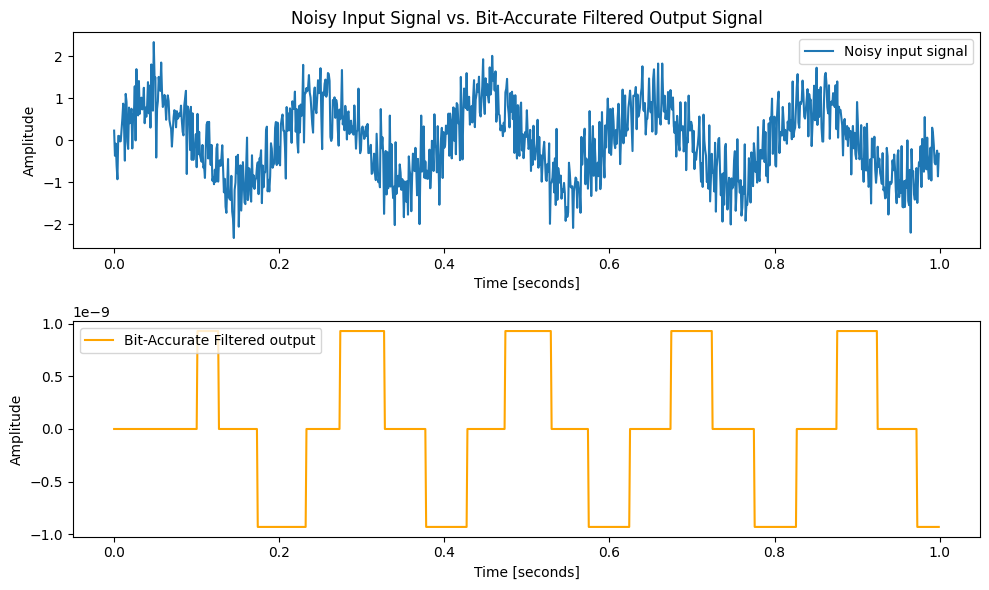

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Helper function to simulate fixed-point arithmetic (16-bit signed integers)
def fixed_point(value, frac_bits=15, bits=16):
    max_value = 2**(bits - 1) - 1
    min_value = -2**(bits - 1)
    
    # Quantize to fixed-point range and handle overflow
    quantized_value = np.round(value).astype(np.int32)
    quantized_value = np.clip(quantized_value, min_value, max_value)
    
    # Return scaled fixed-point value
    return quantized_value / (2**frac_bits)

# Bit-accurate FIR filter implementation using fixed-point arithmetic
def bit_accurate_fir_filter(input_signal, filter_coefficients, frac_bits=15):
    num_taps = len(filter_coefficients)
    output_signal = np.zeros(len(input_signal))
    
    # Convert filter coefficients to fixed-point
    fixed_coefficients = fixed_point(filter_coefficients * (2**frac_bits))

    # Apply the FIR filter in fixed-point arithmetic
    for n in range(num_taps, len(input_signal)):
        # Extract relevant section of the input signal
        segment = input_signal[n-num_taps:n]

        # Convert input to fixed-point
        fixed_input = fixed_point(segment * (2**frac_bits))

        # Perform dot product in fixed-point arithmetic
        result = np.dot(fixed_coefficients, fixed_input)
        
        # Scale back down to original range by shifting by the fractional bits
        output_signal[n] = fixed_point(result, frac_bits=2*frac_bits)  # Use higher precision for results
    
    return output_signal

# Design the FIR filter (same as before)
def design_fir_filter(num_taps, cutoff_freq, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normalized_cutoff = cutoff_freq / nyquist
    return signal.firwin(num_taps, normalized_cutoff)

# Generate a sample input signal (a noisy sine wave)
sampling_rate = 1000  # Hz
t = np.linspace(0, 1.0, int(sampling_rate), endpoint=False)  # 1-second time vector
input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))  # 5 Hz sine wave + noise

# Design the FIR low-pass filter
num_taps = 101  # Number of filter coefficients (the length of the filter)
cutoff_freq = 10.0  # Cutoff frequency of the filter in Hz
fir_coefficients = design_fir_filter(num_taps, cutoff_freq, sampling_rate)

# Apply the bit-accurate FIR filter
output_signal_fixed = bit_accurate_fir_filter(input_signal, fir_coefficients)

# Plot the input and output signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label="Noisy input signal")
plt.title("Noisy Input Signal vs. Bit-Accurate Filtered Output Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, output_signal_fixed, label="Bit-Accurate Filtered output", color='orange')
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

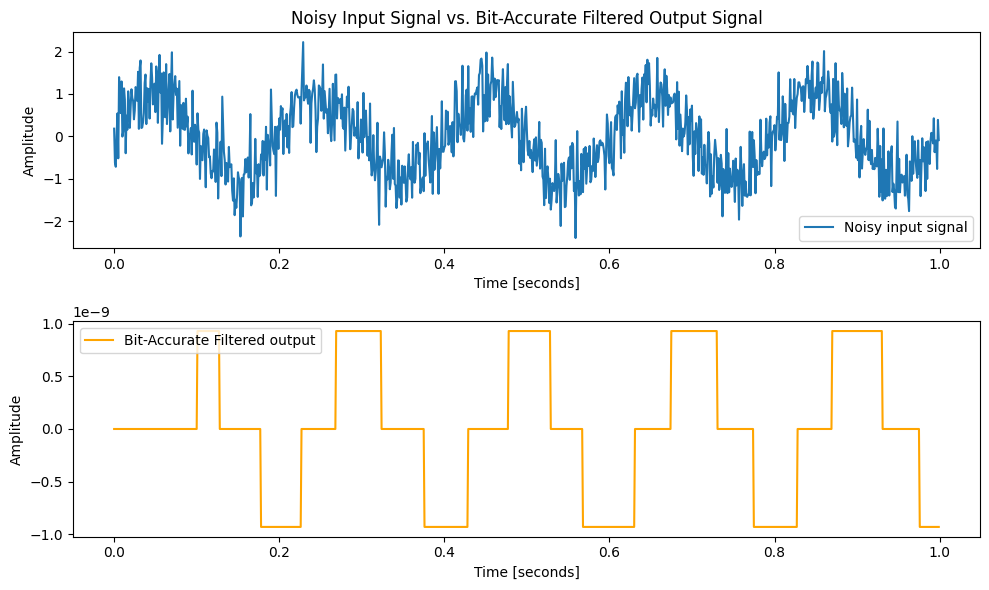

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Helper function to simulate fixed-point arithmetic (16-bit signed integers)
def fixed_point(value, frac_bits=15, bits=16):
    max_value = 2**(bits - 1) - 1
    min_value = -2**(bits - 1)
    
    # Quantize to fixed-point range and handle overflow
    quantized_value = np.round(value).astype(np.int32)
    quantized_value = np.clip(quantized_value, min_value, max_value)
    
    # Return scaled fixed-point value
    return quantized_value / (2**frac_bits)

# Bit-accurate FIR filter implementation using fixed-point arithmetic
def bit_accurate_fir_filter(input_signal, filter_coefficients, frac_bits_input=15, frac_bits_coeff=15):
    num_taps = len(filter_coefficients)
    output_signal = np.zeros(len(input_signal))
    
    # Convert filter coefficients to fixed-point
    fixed_coefficients = fixed_point(filter_coefficients * (2**frac_bits_coeff), frac_bits=frac_bits_coeff)

    # Apply the FIR filter in fixed-point arithmetic
    for n in range(num_taps, len(input_signal)):
        # Extract relevant section of the input signal
        segment = input_signal[n-num_taps:n]

        # Convert input to fixed-point
        fixed_input = fixed_point(segment * (2**frac_bits_input), frac_bits=frac_bits_input)

        # Perform dot product in fixed-point arithmetic
        result = np.dot(fixed_coefficients, fixed_input)
        
        # Scale back down to original range by shifting by the fractional bits
        output_signal[n] = fixed_point(result, frac_bits=frac_bits_input + frac_bits_coeff)  # Use higher precision for results
    
    return output_signal

# Design the FIR filter (same as before)
def design_fir_filter(num_taps, cutoff_freq, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normalized_cutoff = cutoff_freq / nyquist
    return signal.firwin(num_taps, normalized_cutoff)

# Generate a sample input signal (a noisy sine wave)
sampling_rate = 1000  # Hz
t = np.linspace(0, 1.0, int(sampling_rate), endpoint=False)  # 1-second time vector
input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))  # 5 Hz sine wave + noise

# Design the FIR low-pass filter
num_taps = 101  # Number of filter coefficients (the length of the filter)
cutoff_freq = 10.0  # Cutoff frequency of the filter in Hz
fir_coefficients = design_fir_filter(num_taps, cutoff_freq, sampling_rate)

# Apply the bit-accurate FIR filter
output_signal_fixed = bit_accurate_fir_filter(input_signal, fir_coefficients)

# Plot the input and output signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label="Noisy input signal")
plt.title("Noisy Input Signal vs. Bit-Accurate Filtered Output Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, output_signal_fixed, label="Bit-Accurate Filtered output", color='orange')
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()
